In [48]:

import pandas as pd
col_names = ['pregnant', 'glucose','bp', 'skin', 'insulin', 'bmi',  'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,age,label
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0


In [49]:

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp']
X = pima[feature_cols] 
y = pima.label 

In [50]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [51]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('diabetes.csv')


X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)
logreg = LogisticRegression(random_state=16, max_iter=500)  
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Predictions:\n", y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


Predictions:
 [1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 1 1]
Accuracy on test set: 0.8229166666666666


c:\Users\Atharv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


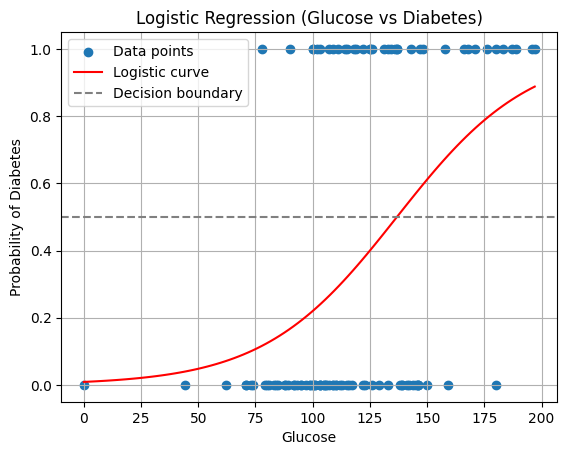

In [53]:



limited_df = df.head(100)
X = limited_df[['Glucose']]
y = limited_df['Outcome']


model = LogisticRegression()
model.fit(X, y)


X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]


plt.scatter(X, y, label='Data points')
plt.plot(X_range, y_prob, color='red', label='Logistic curve')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision boundary')

plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression (Glucose vs Diabetes)')
plt.legend()
plt.grid(True)
plt.show()


In [54]:

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 25,  42]])

NameError: name 'Text' is not defined

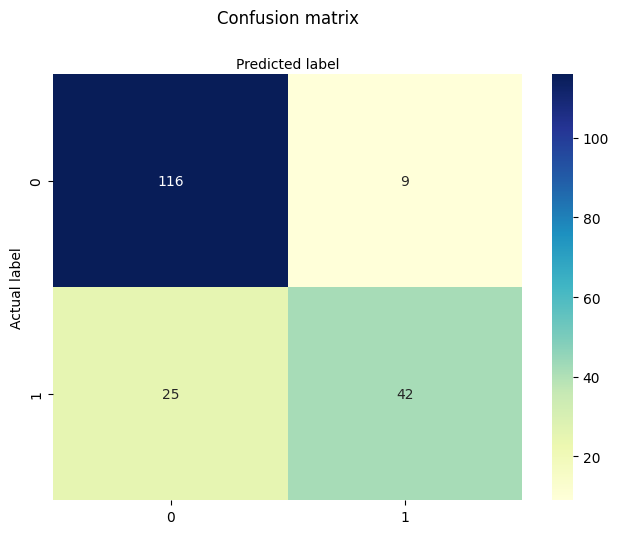

In [55]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label')

In [56]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.82      0.78      0.79       192
    weighted avg       0.82      0.82      0.82       192

